# Model Validation

In [1]:
import sys
import warnings
import pandas as pd
import joblib
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from yellowbrick.regressor import ResidualsPlot, PredictionError

warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

sys.path.append("../../")

## Load Data

In [2]:
training_set = pd.read_csv("training_set.csv")
testing_set = pd.read_csv("testing_set.csv")

In [3]:
# separating the feature columns from the target column
feature_columns = ["age", "sex", "bmi", "children", "smoker", "region"]
target_column = "charges"

X_train = training_set[feature_columns]
y_train = training_set[target_column]

X_test = testing_set[feature_columns]
y_test = testing_set[target_column]

## Load Model

In [4]:
model = joblib.load("model.joblib")

## Calculating Model Metrics

In [5]:
predictions = model.predict(X_test)

In [6]:
r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

print("r2 score: ", r2)
print("mean squared error: ", mse)
print("mean absolute error: ", mae)

r2 score:  0.907048999992486
mean squared error:  13717103.46546825
mean absolute error:  2093.4433132990057


## Generate Residuals Plot

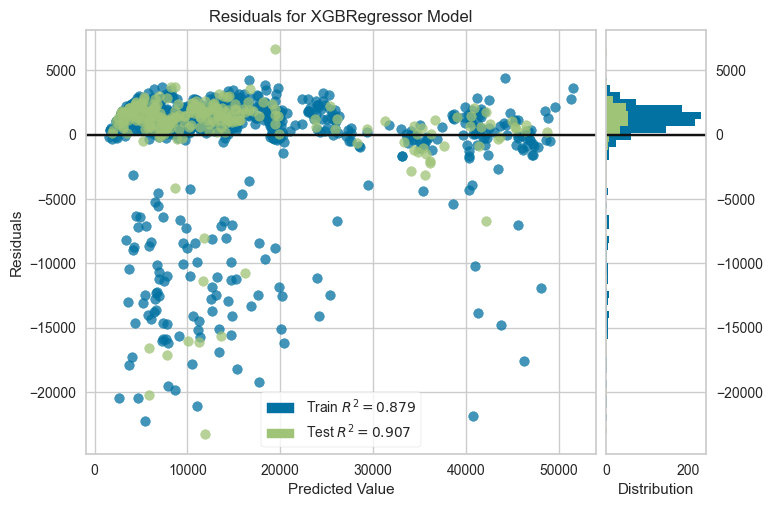

<Axes: title={'center': 'Residuals for XGBRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [7]:
# Instantiate the linear model and visualizer
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

## Generate Prediction Error Plot

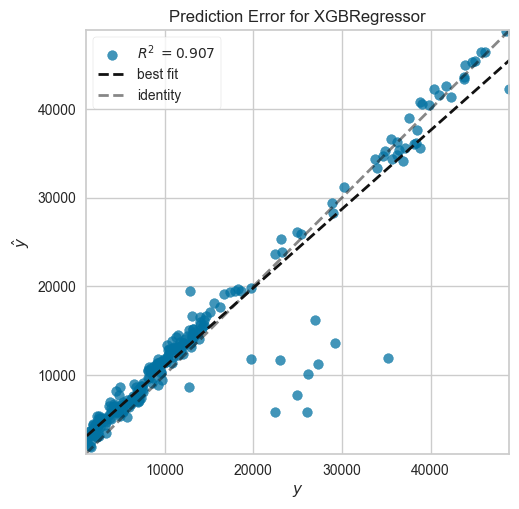

<Axes: title={'center': 'Prediction Error for XGBRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [8]:
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()